In [1]:
import math
import random
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [2]:
fx = lambda x: ((15 * x**3 + 21 * x**2 + 41 * x + 3)**0.25) * math.exp(-0.5*x)
a = 1
b = 4
step = 100

In [3]:
def approx_integration(n, a, b, fx):
    sum = 0
    for i in range(n):
        xi = random.uniform(a, b)
        sum += fx(xi)
    return (1/n) * (b-a) * sum
        
def compare(fx, a, b, n):
    
    res2 = scipy.integrate.quad(fx, a, b)
    closet_idx = 0
    loop_idx = 0
    diff = 1000000000
    
    arr = []
    for ii in range(n, 10000 + n, n ):
        temp = approx_integration(ii, a, b, fx)
        print("i ", ii, " res ", temp)
        arr.append(temp)
        
        if abs(temp - res2[0]) < diff:
            diff = abs(temp - res2[0])
            closet_idx = loop_idx
        loop_idx += 1
    
    print("scipy integrate ", res2)
    print("closet index ", closet_idx, " with val ", arr[closet_idx])
    
    return arr, res2, closet_idx



i  100  res  4.044311093103889
i  200  res  4.10449472256642
i  300  res  4.038413660910905
i  400  res  3.9766525503361003
i  500  res  4.003505595566245
i  600  res  4.028116632148006
i  700  res  3.9706288783393227
i  800  res  4.021263983893728
i  900  res  4.031700203821721
i  1000  res  4.062949283729916
i  1100  res  3.980809211533229
i  1200  res  3.9875957344788913
i  1300  res  3.994666277512218
i  1400  res  3.9794039512767636
i  1500  res  4.013671681805691
i  1600  res  3.998832197381433
i  1700  res  3.995948151907869
i  1800  res  3.993651951991221
i  1900  res  4.008361189599063
i  2000  res  4.004992316340837
i  2100  res  4.011026420602393
i  2200  res  3.9780294118906396
i  2300  res  4.015579134674113
i  2400  res  3.9690754988153767
i  2500  res  4.011429162580879
i  2600  res  4.010571995966019
i  2700  res  4.003790136987201
i  2800  res  3.9974855107335654
i  2900  res  4.025406496025872
i  3000  res  4.017515018335386
i  3100  res  4.002029212082155
i  3200  re

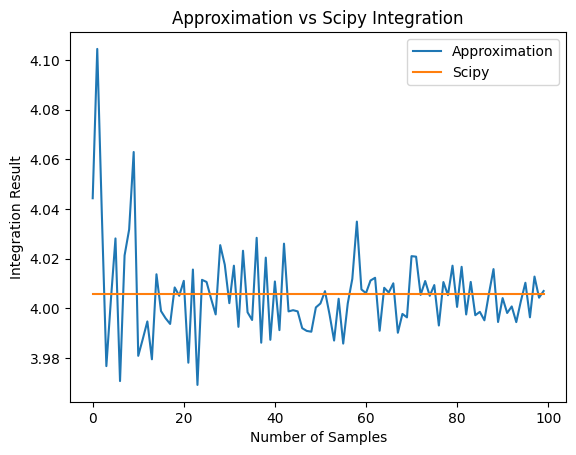

In [4]:
#req 1
arr, res2, closet_idx = compare(fx, a, b, step)  

# Plot the results on the same graph
plt.plot(arr, label="Approximation")
plt.plot([res2[0]] * len(arr), label="Scipy")
plt.title("Approximation vs Scipy Integration")
plt.xlabel("Number of Samples")
plt.ylabel("Integration Result")
plt.legend()
plt.show()

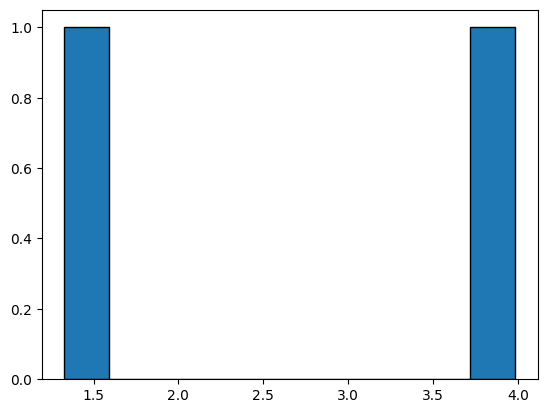

req2 stddev  1.327703949968876


In [5]:
#req 2 #NOT DONE
step = 1000
lst = []
for i in range(500):
    t = approx_integration(step, a, b, fx)  
    lst.append([ t/(b-a), t])

fig, ax = plt.subplots()
ax.hist(lst[0], bins=10, edgecolor='black')

# Display the graph
plt.show() 
#histogram isn't done/correct

print("req2 stddev ", np.std(lst[0]))